In [175]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [176]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [177]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [178]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [179]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scale_data = StandardScaler().fit_transform(df_market_data)

In [180]:
# Create a DataFrame with the scaled data
scaled_df  = pd.DataFrame(scale_data)

# Copy the crypto names from the original DataFrame
scaled_df.columns = df_market_data.columns

# Set the coin_id column as index
scaled_df.index = df_market_data.index

# Display the scaled DataFrame
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [181]:
# Create a list with the number of k-values from 1 to 11
k = range(1, 11)

In [182]:
import warnings
warnings.filterwarnings('ignore')

In [183]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df)
    inertia.append(model.inertia_)
              

In [184]:
# Create a dictionary with the data to plot the Elbow curve
df1 = pd.DataFrame()
df1["k"] = k 
df1["inertia"] = inertia

# Create a DataFrame with the data to plot the Elbow curve
df1

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,55.389957
6,7,43.914690
7,8,36.550527
8,9,32.608455
9,10,28.745489


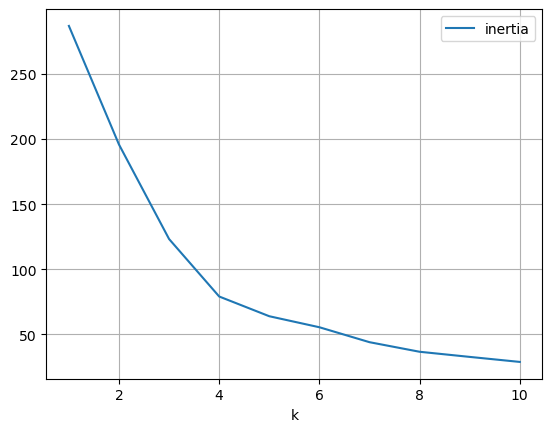

In [185]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df1.plot("k",  "inertia", grid=True);

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [186]:
# Initialize the K-Means model using the best value for k
model = KMeans(4)

In [187]:
# Fit the K-Means model using the scaled DataFrame
model.fit(scale_data)

KMeans(n_clusters=4)

In [188]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
prep = model.predict(scale_data)

# Print the resulting array of cluster values.
prep

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 1, 2, 1, 1, 1, 1])

In [189]:
# Create a copy of the scaled DataFrame
copied_df = scaled_df.copy()

In [190]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
copied_df['clusters'] = prep

# Display the copy of the scaled DataFrame
copied_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [191]:
hvplot.help(kind='scatter')


The `scatter` plot visualizes your points as markers in 2D space. You can visualize
one more dimension by using colors.

The `scatter` plot is a good first way to plot data with non continuous axes.

Reference: https://hvplot.holoviz.org/reference/pandas/scatter.html

Parameters
----------
x : string, optional
    Field name(s) to draw x-positions from. If not specified, the index is
    used. Can refer to continous and categorical data.
y : string or list, optional
    Field name(s) to draw y-positions from. If not specified, all numerical
    fields are used.
marker : string, optional
    The marker shape specified above can be any supported by matplotlib, e.g. s, d, o etc.
    See https://matplotlib.org/stable/api/markers_api.html.
c : string, optional
    A color or a Field name to draw the color of the marker from
s : int, optional, also available as 'size'
    The size of the marker
by : string, optional
    A single field or list of fields to group by. All the subgroups are vis

In [192]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
copied_df.hvplot.scatter(
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    c = 'clusters',
    hover_cols = ['coin_id']
    
)

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [193]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(3)

In [194]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(copied_df)

# View the scaled PCA data
pca_data[:5]

array([[-0.98927075,  0.71515999,  0.49382193],
       [-0.80114992,  0.38686277,  1.01001186],
       [-0.25723805, -0.29436771, -0.71543698],
       [-0.28931239, -0.35459601, -0.56121306],
       [-1.84988759,  1.75473268,  1.71168922]])

In [195]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.38141983, 0.33155857, 0.17643803])

In [196]:
sum(pca.explained_variance_ratio_)

0.8894164303643379

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.890044939868115

In [197]:
# Create a new DataFrame with the PCA data.
pca_data = pd.DataFrame(pca_data, columns= ["pca1", "pca2", "pca3"])

# Copy the crypto names from the original scaled DataFrame
pca_data['coin_id'] = df_market_data.index

# Set the coin_id column as index
pca_data = pca_data.set_index(['coin_id'])
# Display the scaled PCA DataFrame
pca_data.head(10)

,pca1,pca2,pca3
coin_id,,,
bitcoin,-0.989271,0.715160,0.493822
ethereum,-0.801150,0.386863,1.010012
tether,-0.257238,-0.294368,-0.715437
ripple,-0.289312,-0.354596,-0.561213
bitcoin-cash,-1.849888,1.754733,1.711689
binancecoin,-1.052689,1.268868,0.805956
chainlink,-0.914743,0.474010,2.839876
cardano,-0.787229,0.684855,1.517126
litecoin,-0.951595,0.308202,0.646095


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [198]:
# Create a list with the number of k-values from 1 to 11
kvalues_pca = list (range(1,11))

In [199]:
# Create an empty list to store the inertia values
invalues_pca = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in kvalues_pca:
  kmeans_model = KMeans(n_clusters=k)
  kmeans_model.fit(pca_data)
  invalues_pca.append(kmeans_model.inertia_)

In [200]:
# Create a dictionary with the data to plot the Elbow curve
elbow_pca = {"k" : kvalues_pca, "inertia": invalues_pca}
# Create a DataFrame with the data to plot the Elbow curve
df_elbowc_pca = pd.DataFrame(elbow_pca)
df_elbowc_pca.head()

,k,inertia
0,1,269.102703
1,2,175.890121
2,3,99.179766
3,4,46.988179
4,5,36.404552


In [201]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbowc_pca.hvplot.line(
    x= "k",
    y="inertia",
    title = "PCA Elbow Curve",
    xticks=k   
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** yes

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [202]:
# Initialize the K-Means model using the best value for k
best_k_model = KMeans(n_clusters=4, random_state = 0)

In [203]:
# Fit the K-Means model using the PCA data
best_k_model.fit(pca_data)

KMeans(n_clusters=4, random_state=0)

In [204]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame


# Print the resulting array of cluster values.
pca_prediction = best_k_model.predict(pca_data)
print(pca_prediction)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [205]:
# Create a copy of the scaled PCA DataFrame
df_pca_prediction_copy = pca_data.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_prediction_copy['cluster'] = pca_prediction

# Display the copy of the scaled PCA DataFrame
df_pca_prediction_copy.head(5)

,pca1,pca2,pca3,cluster
coin_id,,,,
bitcoin,-0.989271,0.715160,0.493822,1
ethereum,-0.801150,0.386863,1.010012,1
tether,-0.257238,-0.294368,-0.715437,0
ripple,-0.289312,-0.354596,-0.561213,0
bitcoin-cash,-1.849888,1.754733,1.711689,1


In [206]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_pca_prediction_copy.hvplot.scatter(
    x="pca1",
    y="pca2",
    title=" PCA Clusters ",
    by='cluster',
    hover_cols='coin_id' 
)
%matplotlib inline
df_pca_prediction_copy

,pca1,pca2,pca3,cluster
coin_id,,,,
bitcoin,-0.989271,0.715160,0.493822,1
ethereum,-0.801150,0.386863,1.010012,1
tether,-0.257238,-0.294368,-0.715437,0
ripple,-0.289312,-0.354596,-0.561213,0
bitcoin-cash,-1.849888,1.754733,1.711689,1
binancecoin,-1.052689,1.268868,0.805956,1
chainlink,-0.914743,0.474010,2.839876,1
cardano,-0.787229,0.684855,1.517126,1
litecoin,-0.951595,0.308202,0.646095,1


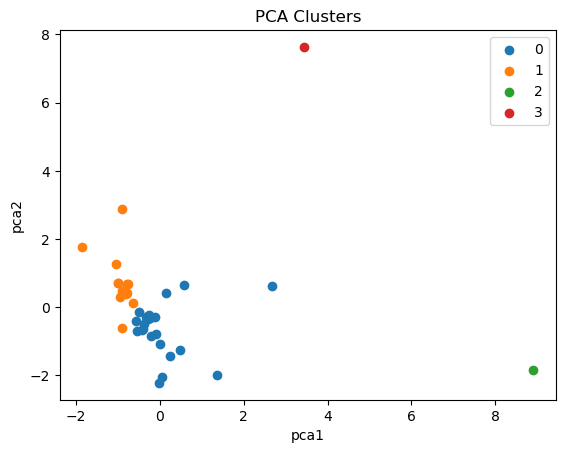

In [207]:
groups = df_pca_prediction_copy.groupby('cluster')
for name, group in groups:
    plt.scatter(group['pca1'], group['pca2'], label=name)
plt.title('PCA Clusters')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [212]:
# Composite plot to contrast the Elbow curves
data_1= df_elbowc_pca.hvplot.line(
    x="k", 
    y="inertia",
    title='Elbow Curve Scaled'
)
data_2 = df_elbowc_pca.hvplot.line(
    x="k", 
    y="inertia",
    title='Elbow Curve PCA' )

In [221]:
# Composite plot to contrast the clusters
p1 = copied_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols = 'coin_id',
    title='Crypto Clusters  Scaled'
)
p2 = df_pca_prediction_copy.hvplot.scatter(
    x="pca1",
    y="pca2",
    by="cluster",
    hover_cols = 'coin_id',
    title='Crypto Clusters PCA')


<bound method hvPlotTabular.scatter of <hvplot.plotting.core.hvPlotTabular object at 0x00000270E1A06950>>

In [222]:
combined_plot = p1 + p2
combined_plot

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [pca1]   (pca2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** using fewer features would likely result in less accurate clustering.